# The Data

In [1]:
import pandas as pd
%matplotlib inline

df_ks = pd.read_csv('ks-projects-201801.csv', index_col='ID')
df_ks

name  \
ID                                                              
1000002330                    The Songs of Adelaide & Abullah   
1000003930      Greeting From Earth: ZGAC Arts Capsule For ET   
1000004038                                     Where is Hank?   
1000007540  ToshiCapital Rekordz Needs Help to Complete Album   
1000011046  Community Film Project: The Art of Neighborhoo...   
...                                                       ...   
999976400   ChknTruk Nationwide Charity Drive 2014 (Canceled)   
999977640                                           The Tribe   
999986353   Walls of Remedy- New lesbian Romantic Comedy f...   
999987933                            BioDefense Education Kit   
999988282                   Nou Renmen Ayiti!  We Love Haiti!   

                   category main_category currency    deadline     goal  \
ID                                                                        
1000002330           Poetry    Publishing      GBP  2015-10-09   1000.0   
1000003930   Narrative Film  Film & Video      USD  2017-11-01  30000.0   
1000004038   Narrative Film  Film & Video      USD  2013-02-26  45000.0   
1000007540            Music         Music      USD  2012-04-16   5000.0   
1000011046     Film & Video  Film & Video      USD  2015-08-29  19500.0   
...                     ...           ...      ...         ...      ...   
999976400       Documentary  Film & Video      USD  2014-10-17  50000.0   
999977640    Narrative Film  Film & Video      USD  2011-07-19   1500.0   
999986353    Narrative Film  Film & Video      USD  2010-08-16  15000.0   
999987933        Technology    Technology      USD  2016-02-13  15000.0   
999988282   Performance Art           Art      USD  2011-08-16   2000.0   

                       launched  pledged     state  backers country  \
ID                                                                    
1000002330  2015-08-11 12:12:28      0.0    failed        0      GB   
1000003930  2017-09-02 04:43:57   2421.0    failed       15      US   
1000004038  2013-01-12 00:20:50    220.0    failed        3      US   
1000007540  2012-03-17 03:24:11      1.0    failed        1      US   
1000011046  2015-07-04 08:35:03   1283.0  canceled       14      US   
...                         ...      ...       ...      ...     ...   
999976400   2014-09-17 02:35:30     25.0  canceled        1      US   
999977640   2011-06-22 03:35:14    155.0    failed        5      US   
999986353   2010-07-01 19:40:30     20.0    failed        1      US   
999987933   2016-01-13 18:13:53    200.0    failed        6      US   
999988282   2011-07-19 09:07:47    524.0    failed       17      US   

            usd pledged  usd_pledged_real  usd_goal_real  
ID                                                        
1000002330          0.0               0.0        1533.95  
1000003930        100.0            2421.0       30000.00  
1000004038        220.0             220.0       45000.00  
1000007540          1.0               1.0        5000.00  
1000011046       1283.0            1283.0       19500.00  
...                 ...               ...            ...  
999976400          25.0              25.0       50000.00  
999977640         155.0             155.0        1500.00  
999986353          20.0              20.0       15000.00  
999987933         200.0             200.0       15000.00  
999988282         524.0             524.0        2000.00  

[378661 rows x 14 columns]

# Number of Countries That Participate on KickStarter

In [2]:
df_ks.country.nunique()

23

# Number of Kickstarters Under Each Country

In [3]:
df_kscountry = df_ks['country'].value_counts().rename_axis('Country').reset_index(name='Count')
df_kscountry

Country   Count
0       US  292627
1       GB   33672
2       CA   14756
3       AU    7839
4       DE    4171
5     N,0"    3797
6       FR    2939
7       IT    2878
8       NL    2868
9       ES    2276
10      SE    1757
11      MX    1752
12      NZ    1447
13      DK    1113
14      IE     811
15      CH     761
16      NO     708
17      HK     618
18      BE     617
19      AT     597
20      SG     555
21      LU      62
22      JP      40

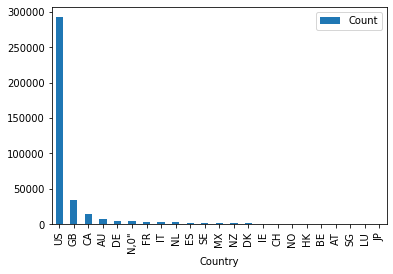

In [4]:
import matplotlib.pyplot as plt
kscountryPlot = df_kscountry.plot.bar('Country','Count')

# Backers vs Pledged

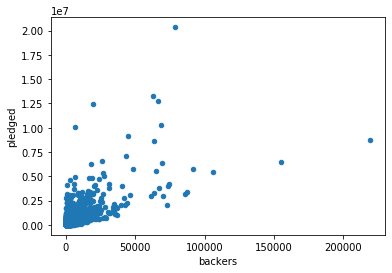

In [5]:
ksBackerPlot = df_ks.plot.scatter('backers','pledged')

# Analyzing the 'State' of KickStarters

In [6]:
df_ks[['name','state']]

name     state
ID                                                                     
1000002330                    The Songs of Adelaide & Abullah    failed
1000003930      Greeting From Earth: ZGAC Arts Capsule For ET    failed
1000004038                                     Where is Hank?    failed
1000007540  ToshiCapital Rekordz Needs Help to Complete Album    failed
1000011046  Community Film Project: The Art of Neighborhoo...  canceled
...                                                       ...       ...
999976400   ChknTruk Nationwide Charity Drive 2014 (Canceled)  canceled
999977640                                           The Tribe    failed
999986353   Walls of Remedy- New lesbian Romantic Comedy f...    failed
999987933                            BioDefense Education Kit    failed
999988282                   Nou Renmen Ayiti!  We Love Haiti!    failed

[378661 rows x 2 columns]

### List of unique state types and total number of kickstarters in data

In [7]:
df_ks.state.unique()

array(['failed', 'canceled', 'successful', 'live', 'undefined',
       'suspended'], dtype=object)

In [8]:
df_ks.shape[0]

378661

### Count/occurance of each state type 

In [9]:
df_ks_state_count = df_ks['state'].value_counts().rename_axis('State').reset_index(name='Count')
df_ks_state_count

State   Count
0      failed  197719
1  successful  133956
2    canceled   38779
3   undefined    3562
4        live    2799
5   suspended    1846

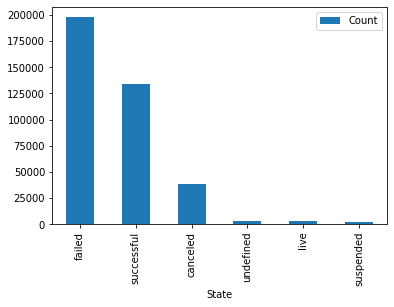

In [10]:
ks_state_count_plot = df_ks_state_count.plot.bar('State','Count')
ks_state_count_plot

#### As we can see, more than half of the kickstarters in our data ended pre-maturely in some manner (Failed, Cancelled).
#### Now lets see if there is any kind of trend between kickstarter categories and their success....

### Different main categories in KickStarter data

In [11]:
categories_array = df_ks.main_category.unique()
categories_array

array(['Publishing', 'Film & Video', 'Music', 'Food', 'Design', 'Crafts',
       'Games', 'Comics', 'Fashion', 'Theater', 'Art', 'Photography',
       'Technology', 'Dance', 'Journalism'], dtype=object)

### Total count of kickstarts under each category

In [12]:
df_ks_category_count = df_ks['main_category'].value_counts().rename_axis('Category').reset_index(name='Count')
df_ks_category_count

Category  Count
0   Film & Video  63585
1          Music  51918
2     Publishing  39874
3          Games  35231
4     Technology  32569
5         Design  30070
6            Art  28153
7           Food  24602
8        Fashion  22816
9        Theater  10913
10        Comics  10819
11   Photography  10779
12        Crafts   8809
13    Journalism   4755
14         Dance   3768

#### Blooper

In [13]:
# create a new data frame for each category showing the successful kickstarters. Place in array.
successful_df_array = []
for category in categories_array:
    created_dataframe = df_ks[ (df_ks['main_category'] == category) & (df_ks['state'] == 'successful')]
    successful_df_array.append(created_dataframe)

# Merge dataframes .... This when I realized there was a simple way ....

### New data frame showing all of the successful kickstarters

In [14]:
successful_ks_df = df_ks[df_ks['state'] == 'successful']
successful_ks_df

name  \
ID                                                              
1000014025                               Monarch Espresso Bar   
1000023410  Support Solar Roasted Coffee & Green Energy!  ...   
100005484                                    Lisa Lim New CD!   
1000057089  Tombstone: Old West tabletop game and miniatur...   
1000070642                Mike Corey's Darkness & Light Album   
...                                                       ...   
999929142   ÉPOUVANTAILS : 28mm Figurines de jeux pour KIN...   
999934908                                The Manual Bar Blade   
999943841                                 The Dog Coffee Book   
999969812                                        AT THE BEACH   
999971898                         Beach Wrestling Documentary   

                    category main_category currency    deadline     goal  \
ID                                                                         
1000014025       Restaurants          Food      USD  2016-04-01  50000.0   
1000023410              Food          Food      USD  2014-12-21   1000.0   
100005484         Indie Rock         Music      USD  2013-04-08  12500.0   
1000057089    Tabletop Games         Games      GBP  2017-05-03   5000.0   
1000070642             Music         Music      USD  2012-08-17    250.0   
...                      ...           ...      ...         ...      ...   
999929142     Tabletop Games         Games      EUR  2017-10-31   1000.0   
999934908     Product Design        Design      USD  2015-12-15   3500.0   
999943841   Children's Books    Publishing      USD  2013-11-30    950.0   
999969812    Classical Music         Music      CAD  2014-03-22   5000.0   
999971898        Documentary  Film & Video      NOK  2015-04-28  20000.0   

                       launched   pledged       state  backers country  \
ID                                                                       
1000014025  2016-02-26 13:38:27  52375.00  successful      224      US   
1000023410  2014-12-01 18:30:44   1205.00  successful       16      US   
100005484   2013-03-09 06:42:58  12700.00  successful      100      US   
1000057089  2017-04-05 19:44:18  94175.00  successful      761      GB   
1000070642  2012-08-02 14:11:32    250.00  successful        7      US   
...                         ...       ...         ...      ...     ...   
999929142   2017-10-04 11:26:44   1246.00  successful       35      FR   
999934908   2015-11-23 07:33:14   6169.00  successful      120      US   
999943841   2013-10-18 21:35:04   1732.02  successful       31      US   
999969812   2014-02-20 01:00:16   5501.00  successful       78      CA   
999971898   2015-03-29 21:30:33  21500.00  successful       36      NO   

            usd pledged  usd_pledged_real  usd_goal_real  
ID                                                        
1000014025     52375.00          52375.00       50000.00  
1000023410      1205.00           1205.00        1000.00  
100005484      12700.00          12700.00       12500.00  
1000057089     57763.78         121857.33        6469.73  
1000070642       250.00            250.00         250.00  
...                 ...               ...            ...  
999929142         66.72           1452.47        1165.70  
999934908       6169.00           6169.00        3500.00  
999943841       1732.02           1732.02         950.00  
999969812       5019.92           4983.69        4529.81  
999971898       2698.97           2875.83        2675.19  

[133956 rows x 14 columns]

### The number of successful kickstarters within each category

In [15]:
df_ks_category_successful = successful_ks_df['main_category'].value_counts().rename_axis('Category').reset_index(name='Count')
df_ks_category_successful

Category  Count
0          Music  24197
1   Film & Video  23623
2          Games  12518
3     Publishing  12300
4            Art  11510
5         Design  10550
6        Theater   6534
7     Technology   6434
8           Food   6085
9         Comics   5842
10       Fashion   5593
11   Photography   3305
12         Dance   2338
13        Crafts   2115
14    Journalism   1012

### Comparing total number of kickstarters in each category to the number of successful within that category

In [19]:
# Merge totals data frome with successful dataframe


pd.merge(df_ks_category_count, df_ks_category_successful, on="Category").set_index("Category")

Count_x  Count_y
Category                      
Film & Video    63585    23623
Music           51918    24197
Publishing      39874    12300
Games           35231    12518
Technology      32569     6434
Design          30070    10550
Art             28153    11510
Food            24602     6085
Fashion         22816     5593
Theater         10913     6534
Comics          10819     5842
Photography     10779     3305
Crafts           8809     2115
Journalism       4755     1012
Dance            3768     2338